<a href="https://colab.research.google.com/github/bfatmab/Machine_Learning/blob/main/Aciklayici_Veri_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/1.aciklayici_veri_analizi/data/adult.csv')
df.head()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
# //sütunları ekleyip veri setine bakıyoruz
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
              'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss', 
              'hours-per-week', 'native-country', 'salary']
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# ilk yapmamız gereken veri setimizde eksik veri olup olmadığını ve veri tiplerini kontrol etmek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# # 'non-null' kayıt var yani veri setimizde eksik veri yok demektir.
# Burada hedef değişkenimiz salary olduğu için onun dağılımına value_count()fonk. ile bakarız ve seaborn kütüphanesi ile görselleştiririz


In [ ]:
# Adımlar:
# 1. plt.figure() ile görselin enini ve boyunu belirliyoruz.
# 2. sns.countplot() fonksiyonuna görselleştirmek istediğimiz değişkeni yazıyoruz.
# 3. value_counts() fonksiyonuyla hedef değişkenin dağılımını buluyoruz.

plt.figure(figsize=(8,6))
sns.countplot(x='salary' ,data=df) 
print('Salary Distribution:')
df['salary'].value_counts()

In [ ]:
print("Maaşı 50K'dan düşük olanların yaş karakteristiği:")
print(df[df['salary'] ==' <=50K'].age.describe())
print('')
print("Maaşı 50K'dan yüksek olanların yaş karakteristiği:")
print(df[df['salary'] == ' >50K'].age.describe())

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='education',data=df, order = df['education'].value_counts().index)
plt.xticks(rotation=70)
df['education'].value_counts()

In [ ]:
# çok fazla değer alan bir öznitelik için yaş karakteristiğini incelemek için:
# "groupby()" fonk. kullanırız
df.groupby('education')['age'].describe()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

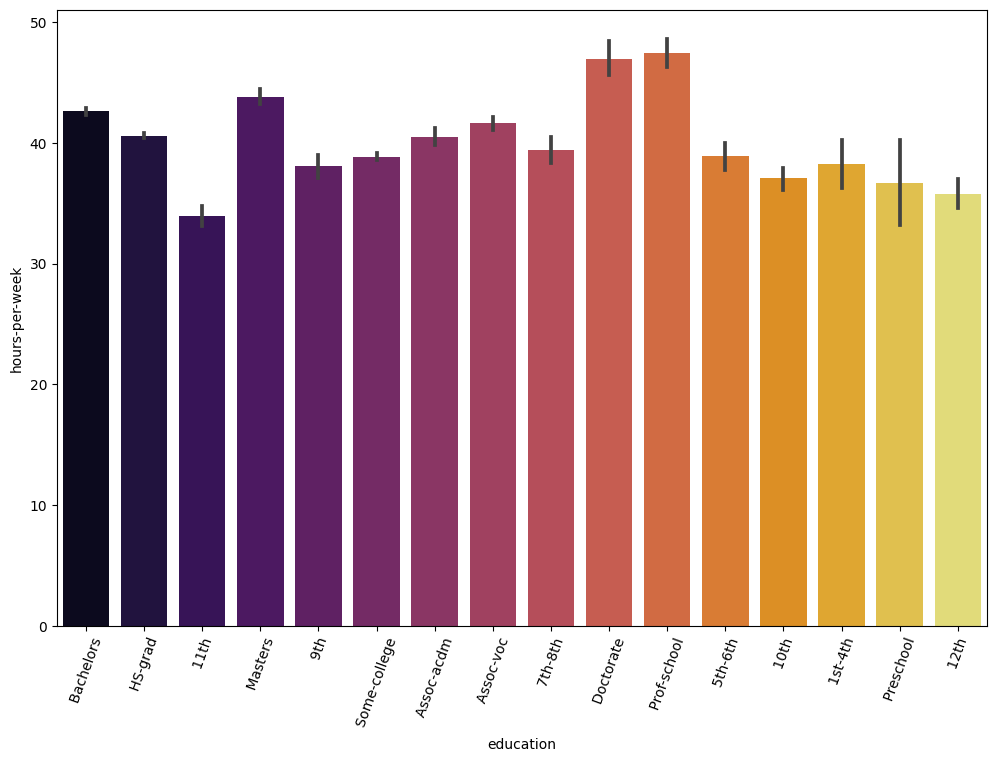

In [ ]:
# şimdi eğitim durumuna göre insanların haftalık ort. çalışma saatlerini inceleyeceğiz.
plt.figure(figsize=(12,8))
sns.barplot(x="education",y="hours-per-week",data=df,palette='inferno')
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

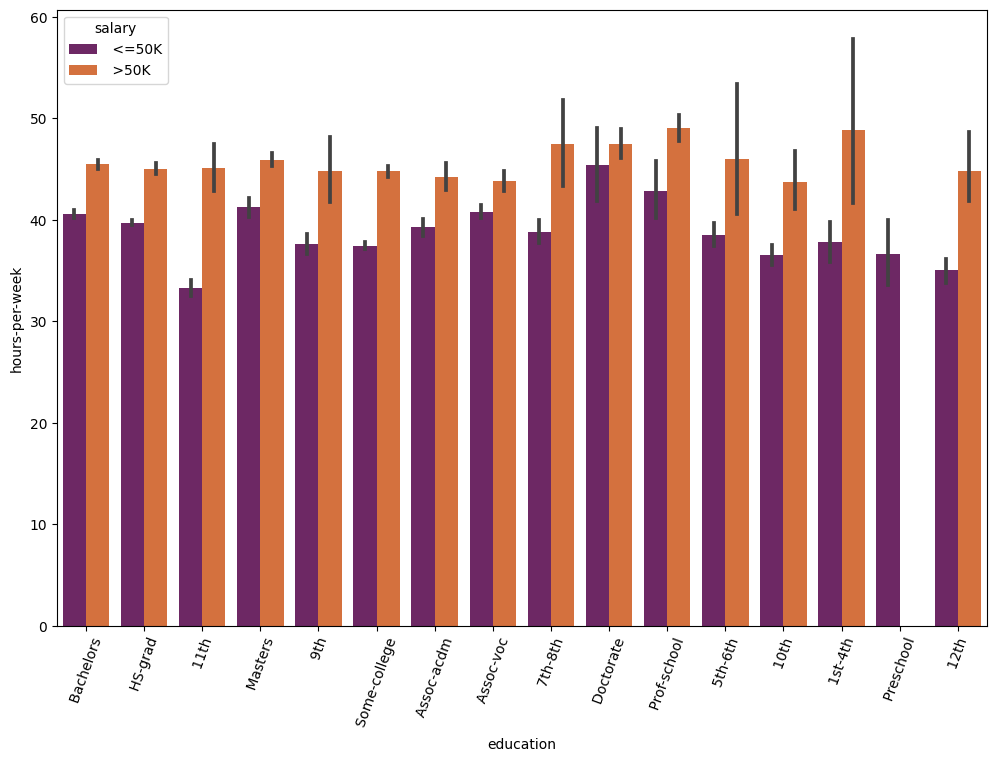

In [ ]:
# Şimdi eğitim durumuna göre insanların haftalık ortalama çalışma saatlerini inceleyeceğiz. 
# Bunu yaparken ayrıca 50K’dan az ve fazla alan kişileri gruplayıp dağılımı öğreneceğiz.
plt.figure(figsize=(12,8))
sns.barplot(x="education",y="hours-per-week",data=df,hue="salary",palette='inferno')
plt.xticks(rotation=70)

In [ ]:
# # Şimdi de verimizi cinsiyete göre gruplayıp insanların haftalık ortalama çalışma saatlerini inceleyeceğiz.
# sns.poinplot kulalnıyoruz bu kez
plt.figure(figsize=(12,8))
sns.pointplot(x="education",y="hours-per-week",hue="sex",palette='dark',
             linestyles=["-","--"],data=df)
plt.xticks(rotation=70)

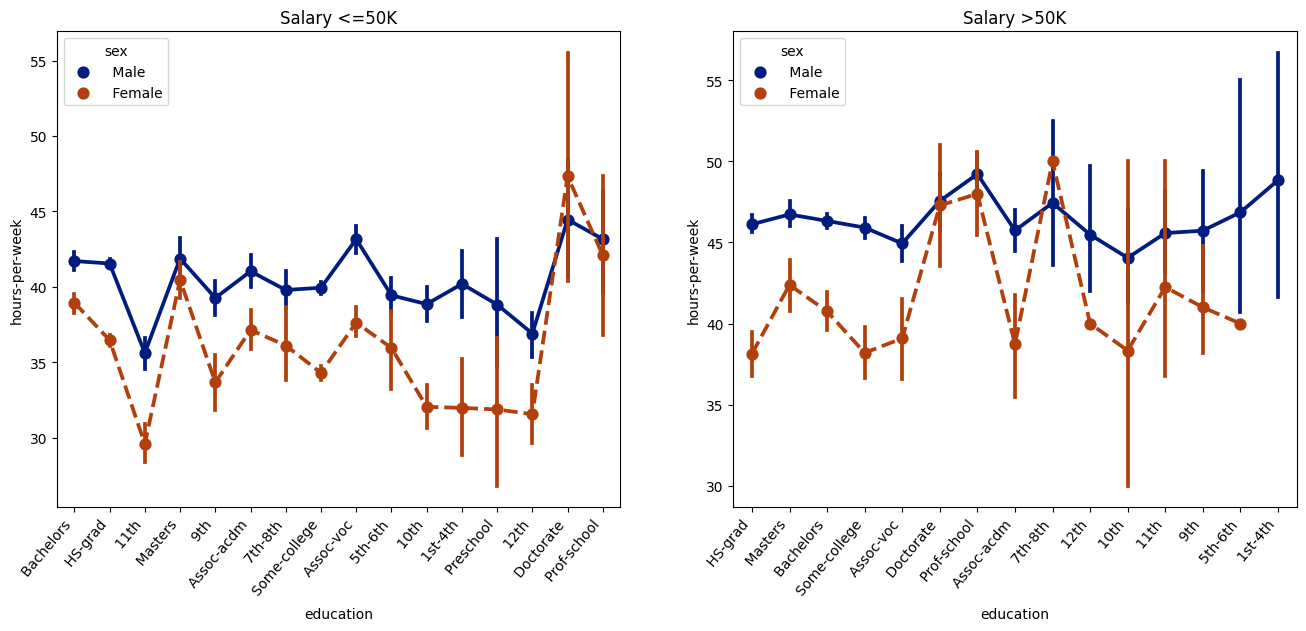

In [ ]:
# Son olarak yukarıdaki yaptığımız maaş ve cinsiyet gruplamalarını birleştiriyoruz ve buna göre insanların haftalık ortalama çalışma saatlerini inceliyoruz.

# plt.subplots() ile görselin enini, boyunu belirliyoruz ve satır, sütun sayısını belirliyoruz.
f, (ax1, ax2) =plt.subplots(1,2,figsize=(16,7))
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark", 
              linestyles=["-", "--"], data=df[df['salary']==' <=50K'], ax=ax1)
ax1.set_title('Salary <=50K')
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark", 
              linestyles=["-", "--"], data=df[df['salary']==' >50K'], ax=ax2)
ax2.set_title('Salary >50K')
f.autofmt_xdate(rotation=50)


